# seabon

seabon 是以 matplotlib 為底層的高階繪圖套件，下面會以 Iris 鳶尾花資料 為範例，來看 seaborn 怎麼用。


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# 讀取資料
X, y = datasets.load_iris(return_X_y=True)

df_iris = pd.DataFrame(data= np.c_[X, y], columns= ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])
df_iris



,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# 這邊提一下 c_, r_ 是串接 矩陣
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.r_[a,b])
print(np.c_[a,b])


[1 2 3 4 5 6]
[[1 4]
 [2 5]
 [3 6]]


下面展示如何用 seabon 畫多個直方圖， bins 是要分幾箱。

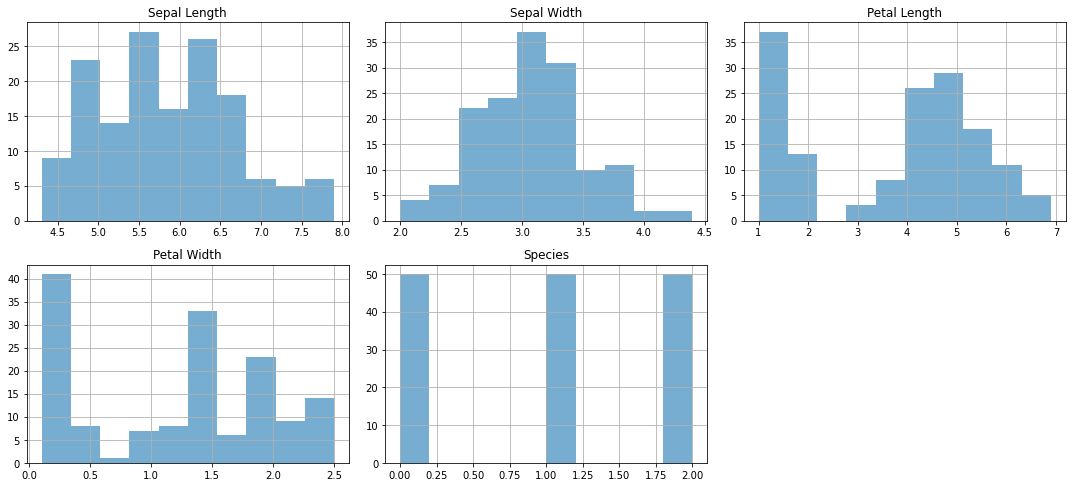

In [12]:

df_data.hist(alpha=0.6, layout=(3,3), figsize=(15, 10), bins=10) 
plt.tight_layout()
plt.show()


下面用 seabon 跟 subplots 展示 多圖，還有 kde (Kernel Density Estimation) 是核密度估計屬於非參數檢驗方法。

<AxesSubplot:xlabel='Petal Width', ylabel='Count'>

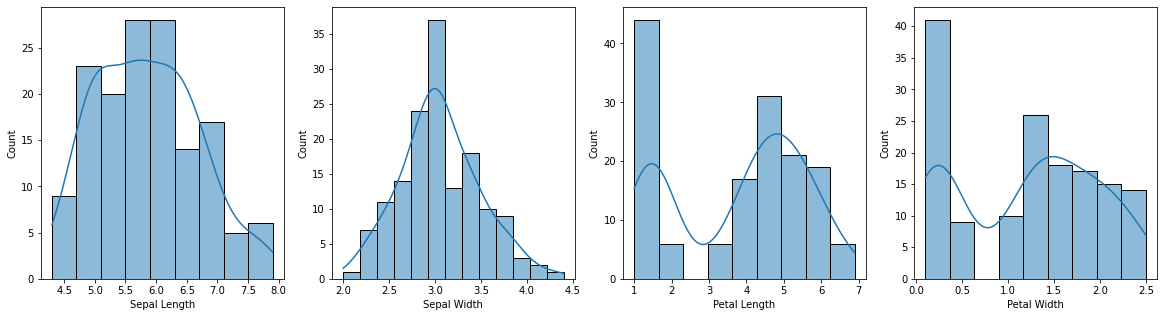

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20, 5)
sns.histplot(df_iris["Sepal Length"][:],ax=axes[0], kde=True)
sns.histplot(df_iris["Sepal Width"][:] ,ax=axes[1], kde=True)
sns.histplot(df_iris["Petal Length"][:],ax=axes[2], kde=True)
sns.histplot(df_iris["Petal Width"][:] ,ax=axes[3], kde=True)


我們也可以看兩個特徵之間的關聯，可以用 height 跟 aspect 調大小。

c:\Users\tobywang\Anaconda3\envs\toby\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


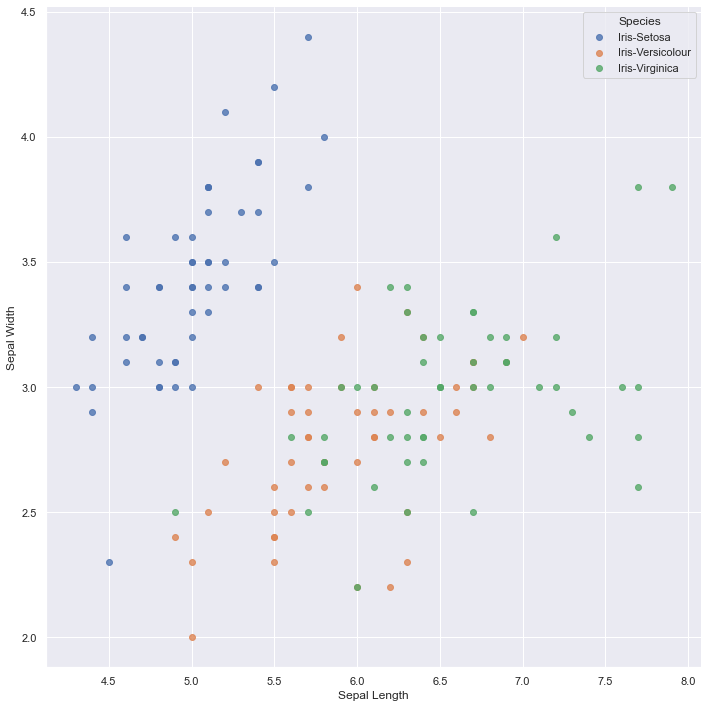

In [29]:

sns.lmplot("Sepal Length", "Sepal Width", hue='Species', data=df_iris, fit_reg=False, legend=False, height=10, aspect=1)
plt.legend(title='Species', loc='upper right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])


也可以直接看兩兩的關聯，中間對角線是用 kde，也可以用hist，[詳細參考](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)。


array([[<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Species', ylabel='Sepal Length'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Species', ylabel='Sepal Width'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Species', ylabel='Petal Length'>],
   

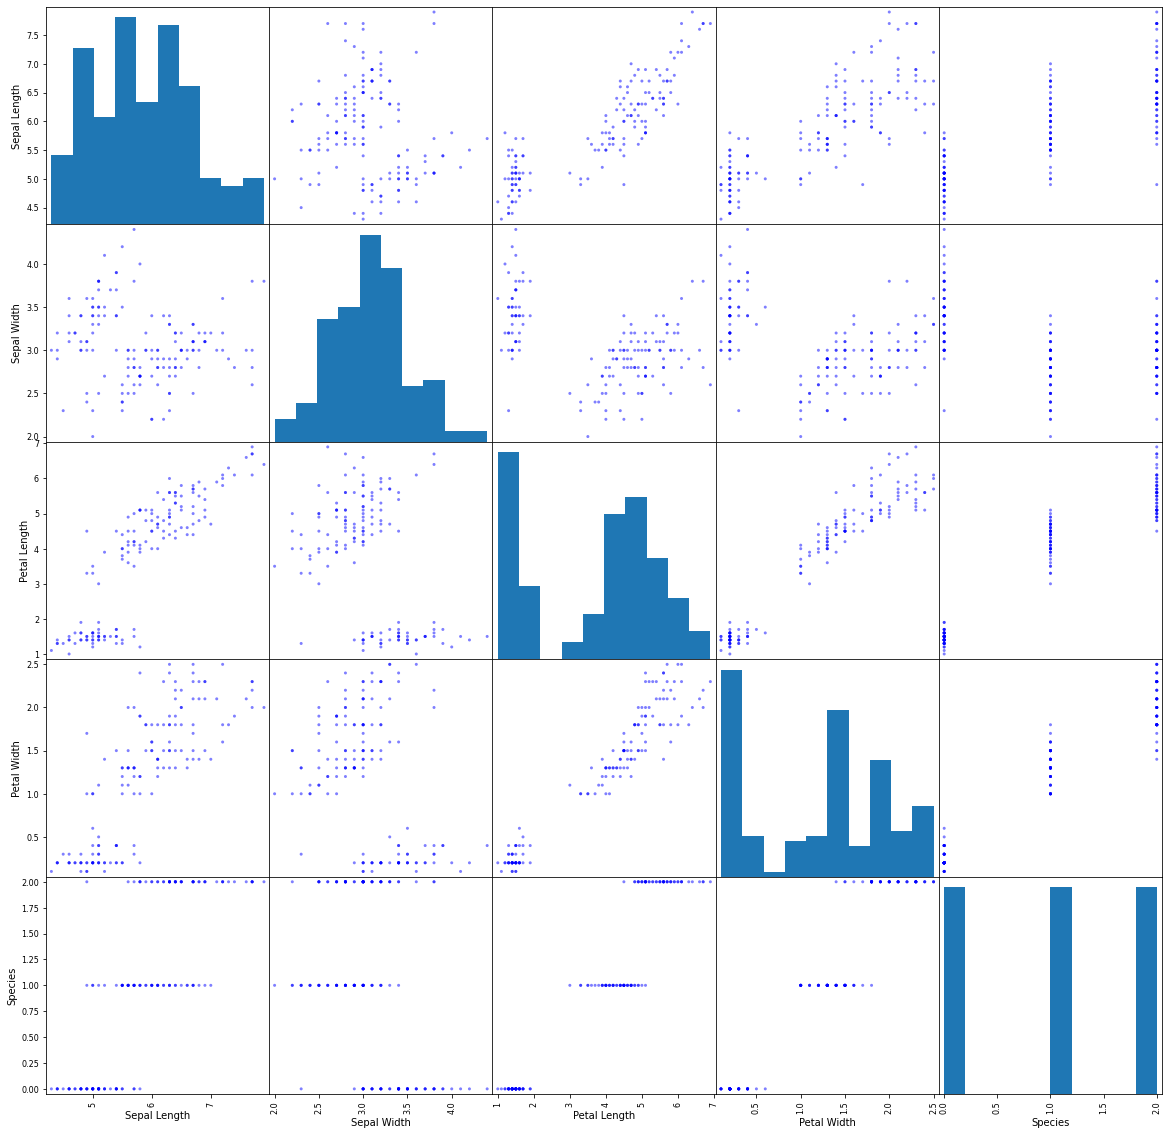

In [18]:
from pandas.plotting import scatter_matrix
#scatter_matrix( df_iris, figsize=(20, 20), color='b', diagonal='kde')
scatter_matrix( df_iris, figsize=(20, 20), color='b', diagonal='hist')



如果要用 seabon，[詳細參數參考](https://seaborn.pydata.org/generated/seaborn.pairplot.html) 。
- 畫圖的參數 ```kind : scatter, kde, hist, reg``` 
- 對角線畫圖參數 ```diag_kind : auto, hist, kde, None``` 


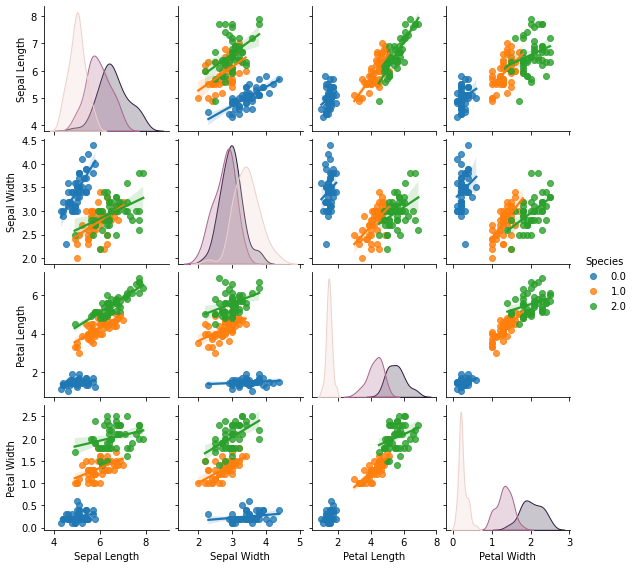

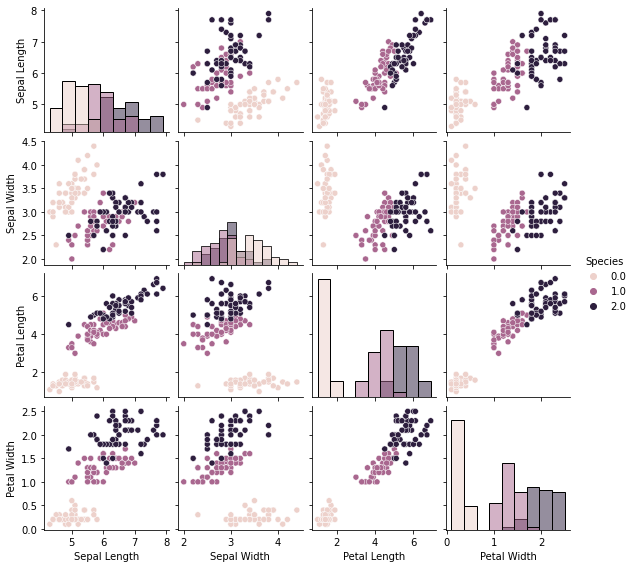

In [20]:
sns.pairplot(df_iris, hue="Species", height=2, kind="reg", diag_kind="kde")
sns.pairplot(df_iris, hue="Species", height=2, kind="scatter", diag_kind="hist")

下面展示如何看 correlation 關聯度，用 seabon 的 heatmap，[詳細參考](https://seaborn.pydata.org/generated/seaborn.heatmap.html)，如果要改顏色配置，seabon的底層是用matplotlib，所以顏色選擇可以[參考](https://matplotlib.org/stable/tutorials/colors/colormaps.html)。

<AxesSubplot:>

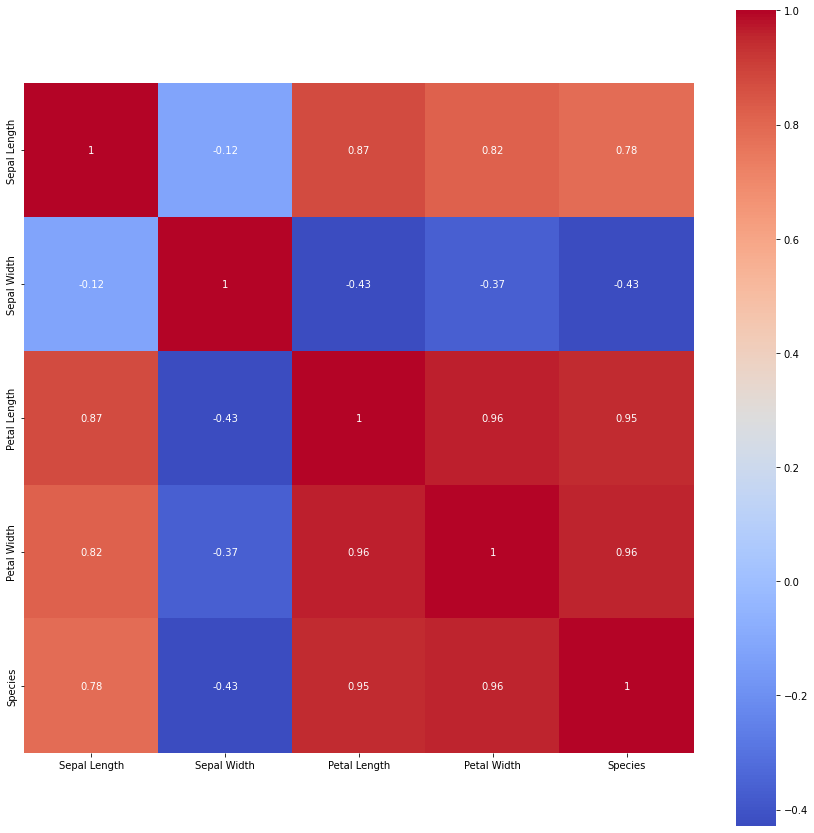

In [22]:
# correlation 計算
correlation = df_iris[['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True, annot=True, cmap="coolwarm")

